# Evaluating poses

**Overview**
In this exercise you will compare high-dimensional vectors of human poses (from a dataset of badminton poses) using distance between poses. The dataset contains 18 sample poses, each defined by 25 points $(x_i, y_i)$. Your task is to calculate the Euclidean distance ($L_2$-norm) between all poses.


<article class="message">
    <div class="message-body">
        <strong>Overview of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#load">Task 1: Load and inspect the data</a>
            </li>
            <li>
            <a href="#inspect">Task 2: Visually inspect and compare poses</a>
            </li>
            <li>
            <a href="#dist">Task 3: Calculate pose distance</a>
            </li>
            <li>
            <a href="#comparison">Task 4: Most similar pose pairs</a>
            </li>
            <li>
            <a href="#comparison2">Task 5: Compare poses</a>
            </li>
        </ul>
    </div>
</article>

The dataset is loaded and stored in an $18\times 50$-dimensional Numpy array. Each row in `poses`
 has the form $x_1, y_1, x_2, y_2, \dots, x_{25}, y_{25}$, i.e. it is a list of $50$ elements constituting $25$ points.

---
**Task 1 (easy): Load and inspect the data💡**
1. Run the cell below to load the data.
2. Print the first pose in the dataset (index 0).

**Note:** Note that the output above is still a 1D array, it is simply printed over multiple lines


---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import util_poses

poses = np.load("data/poses.npy")

In [3]:
# Row 0 has the first pose, and it is specified with x0,y0..
print(poses[0])

[-27.99571178  -6.48683038  -0.11660905  -1.17064333   0.84333174
  -1.17055863   1.40324612  -0.75536782   1.64424262  -0.39685233
  -0.91658014  -1.19784466  -1.47706657  -0.75565014  -1.63809865
  -0.67290277  -0.0346016   -0.2573026    0.52441385  -0.28487094
   0.92472628   0.2406497    1.08637127   0.87586495  -0.35960773
  -0.2296778   -0.75350502   0.46266449  -0.75767282   1.26336037
 -27.99571178  -6.48683038 -27.99571178  -6.48683038   0.4412623
  -1.52924351  -0.43720223  -1.53048571  -1.23831741   1.26319098
  -1.39460965   1.34502082  -0.67480729   1.34740641   0.68458786
   1.12472817   1.08424651   1.09708925   1.16224962   0.93142511]


The cell below visualises each pose in the dataset:


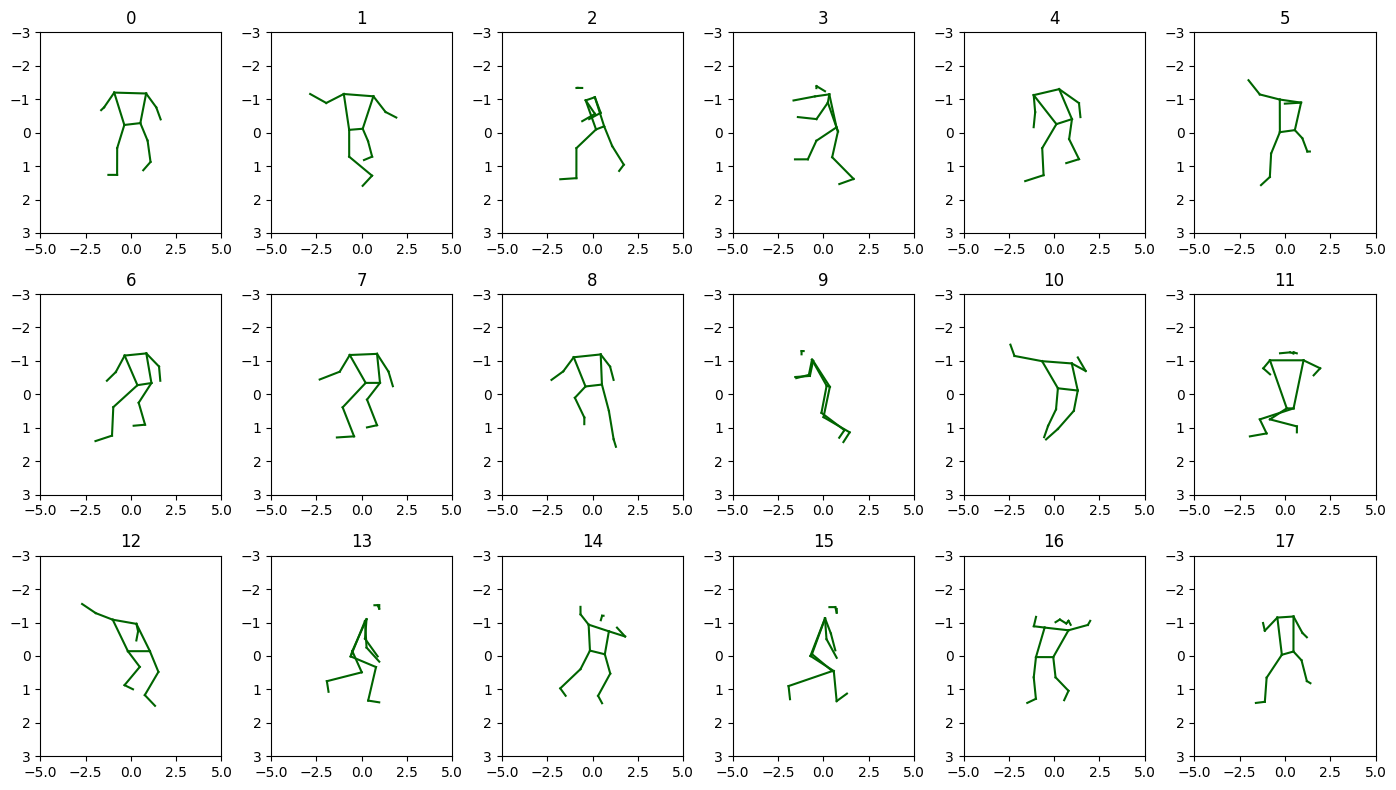

In [4]:
# Create a 6x3 grid of subplots
fig, ax = plt.subplots(3, 6, figsize=(14, 8))

for i, p in enumerate(poses):
    axis = ax[i//6, i%6] # Select the appropriate subplot
    util_poses.plot_single_pose(p, axis)

    axis.set_title(i)
    axis.set_xlim(-5, 5)
    axis.set_ylim(3,-3)


plt.tight_layout()


---
**Task 2 (easy): Visually inspect and compare poses💡**
This task involves visual inspection of the poses.
1. Choose the three pairs of poses that look most similar and note their indices.
2. Choose the three pairs of poses that look least similar and note their indices.


---

In [5]:
print("Similar poses:")
print(poses[4][0],",",poses[4][1])
print(poses[5][0],",",poses[5][1])
print(poses[6][0],",",poses[6][1])

print("Different poses:")
print(poses[4][0],",",poses[4][1])
print(poses[13][0],",",poses[13][1])
print(poses[16][0],",",poses[16][1])


Similar poses:
-27.625319857579353 , -6.991024957607155
-28.152990914908703 , -6.358165762202719
-27.56802868734983 , -7.068407792238805
Different poses:
-27.625319857579353 , -6.991024957607155
0.968088067271309 , -1.4142720258215467
0.6679883072226211 , -0.9712252740724807


In [6]:
# Note the indices of the poses here.
# Poses 4,6,7 are quite similar and their indices are quite similar too

# Poses 4,13,16 are quite different and their indices are quite different too


---
**Task 3 (easy): Calculate pose distance👩‍💻📽️**
In this task you will calculate the Euclidean distance ($L_2$ norm) between all the poses.
**Note:** Note that the distance is symmetric, such that the distance between pairs (a, b) and (b, a) are the same.

1. In the cell below, calculate the Euclidean distance between each combination of poses and store the result in an $18\times 18$ matrix called `res`
 (the name is important as the variable is used below) such that the distance between `poses[i]`
 and `poses[j]`
 is in position $i, j$ in the matrix.


---

In [7]:
# Write your solution here

res = np.zeros((18,18))

for i in range(18):
    for j in range(18):
        res[i,j] = np.linalg.norm(poses[i] - poses[j])


The following cell creates an 18x18 distance matrix: 


<Axes: >

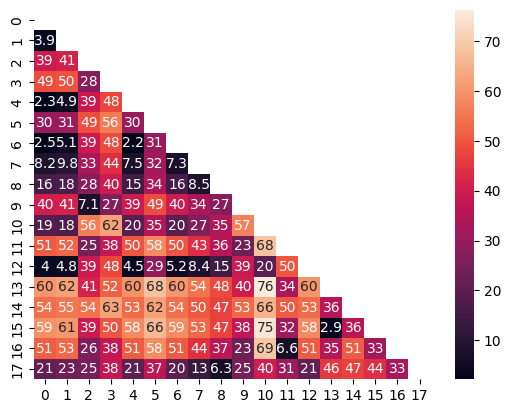

In [8]:
import seaborn as sns
t = np.triu(np.ones_like(res))
sns.heatmap(res, annot=True, mask=t)


---
**Task 4 (medium): Most similar pose pairs👩‍💻**
The **mandatory** part of the exercise has to be entered in [Grasple](https://app.grasple.com/#/courses/10532/ci/733917/diagnoses/12885)
 and requires you to complete question 1.
1. Determine the three most similar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them using the plotting function `plot_pair`
 from the file `util_poses.py`
. The function input is two full pose rows, hence input as e.g `poses[x], poses[y]`
 where `x`
 and `y`
 are indices.
2. Determine the three most dissimilar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them.


---

[2.2114718226569177, 2.297434201974493, 2.5004651789651153]
[6, 4]
[4, 0]
[6, 0]


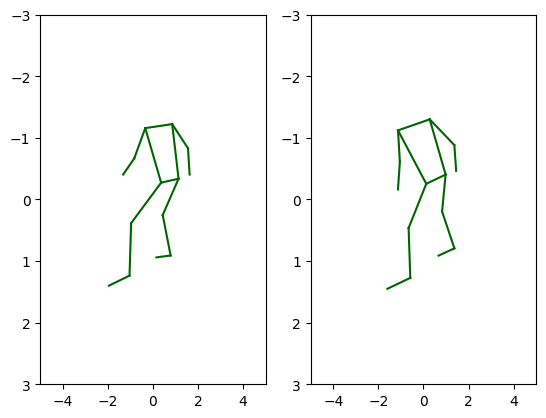

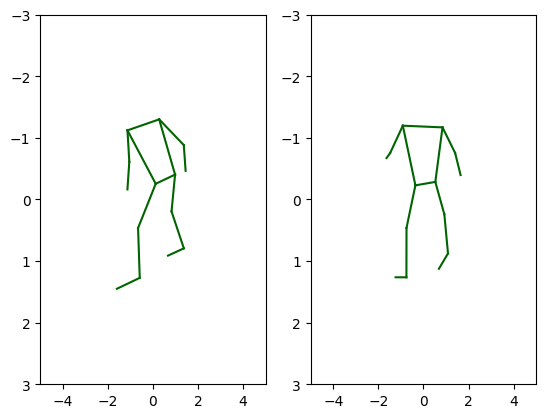

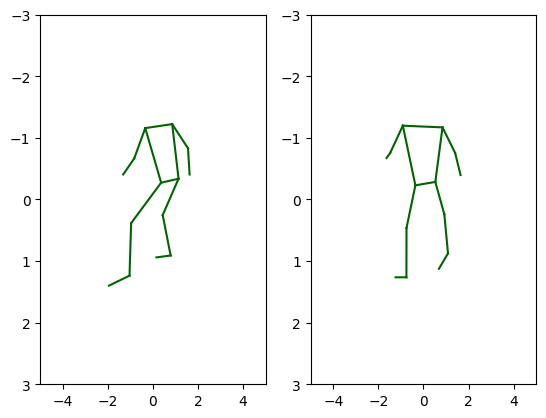

In [18]:
# Write your solution here
nums = []
pose_dict = {}
count = 0

for i in range(18):
    for j in range(18):
        if i == j: break
        elif count < 3:
            count = count + 1
            nums.append(res[i,j])
            pose_dict[res[i,j]] = [i, j]
            nums.sort()
        else:
            nums.sort()
            if nums[2] > res[i,j]:
                nums[2] = res[i,j]
                pose_dict[res[i,j]] = [i, j]
                nums.sort()
                
import util_poses as p
print(nums)
for i in nums:
    print(pose_dict[i])
    p.plot_pair(poses[pose_dict[i][0]],poses[pose_dict[i][1]])


[68.82671465253038, 74.948110344764, 76.25053410711988]
[16, 10]
[15, 10]
[13, 10]


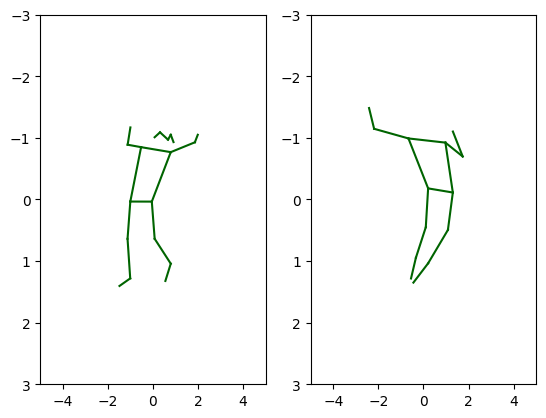

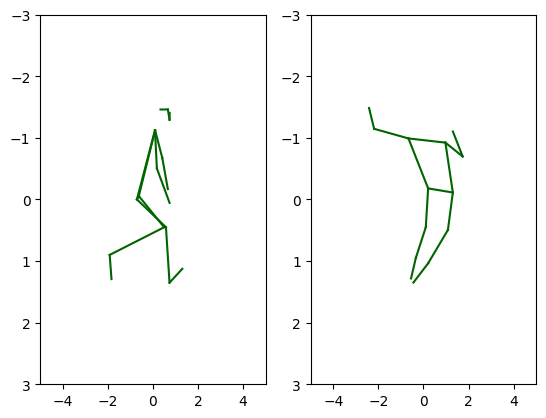

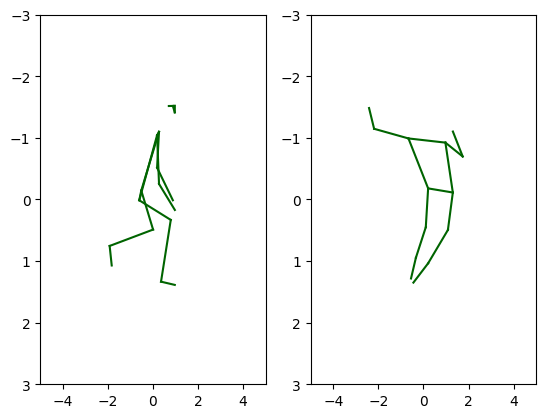

In [17]:
nums = []
pose_dict = {}
count = 0

for i in range(18):
    for j in range(18):
        if i == j: break
        elif count < 3:
            count = count + 1
            nums.append(res[i,j])
            pose_dict[res[i,j]] = [i, j]
            nums.sort()
        else:
            nums.sort()
            if nums[0] < res[i,j]:
                nums[0] = res[i,j]
                pose_dict[res[i,j]] = [i, j]
                nums.sort()
                
import util_poses as p
print(nums)
for i in nums:
    print(pose_dict[i])
    p.plot_pair(poses[pose_dict[i][0]],poses[pose_dict[i][1]])


---
**Task 5 (medium): Compare poses💡📽️**
1. Compare the pose-pairs you chose in [Task 2](#inspect) with the calculated pose-pairs. How well did your intuition match the calculated result?


---

In [ ]:
# write your reflections here
# Well it matched quite well for the first one, but not so well for the second one.